In [1]:
# Import modules
%matplotlib inline

import os

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

### Input uploading & Parameter Grid Search

In [2]:
bucket_root = os.environ['WORKSPACE_BUCKET']
print(bucket_root)


gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09


In [3]:
# find out the path to file by running gsutil commandline tool.

!gsutil ls gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification
    
!gsutil ls gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Kenny200\ high\ accuracy\ data\ and\ notebook

gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/EvMutation_Round_One_Georgiev.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/EvMutation_Round_One_MSA.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/EvMutation_Round_One_ONEHOT.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x2Gx.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x2Mx.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x2Ox.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x2xx_Structure_Input.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x3Gx.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x3Mx.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x3Ox.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x3xx_Structure_Input.

In [4]:
fileName = "x6xx_Structure_Input.csv"

## use the above file location information in the bucket
bucket_loc = "gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/"
!gsutil cp gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x6xx_Structure_Input.csv x6xx_Structure_Input.csv
    
input_df = pd.read_csv(fileName)
print ("(INFO) input uploaded\n")

input_df

Copying gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x6xx_Structure_Input.csv...
/ [1 files][ 11.2 KiB/ 11.2 KiB]                                                
Operation completed over 1 objects/11.2 KiB.                                     
(INFO) input uploaded



id Binding  (50 Percentile Sample) Variance rmsALL  \
0   VIAA       B                                0.033896   
1   AYGM       B                                0.052958   
2   VFGV       B                                0.042157   
3   VHFA       B                                0.031089   
4   VHGL       B                                0.084756   
..   ...     ...                                     ...   
91  LNQV       N                                0.054202   
92  VDDF       N                                0.072175   
93  ATPV       N                                0.047757   
94  TDGR       N                                0.143462   
95  AATV       N                                0.067028   

    (90 Percentile Sample) Variance rmsALL  \
0                                 0.283323   
1                                 0.235934   
2                                 0.256828   
3                                 0.172508   
4                                 0.375101   
..                                     ...   
91                                0.268457   
92                                0.441669   
93                                0.218623   
94                                0.565042   
95                                0.358335   

    (50 Percentile Sample) Variance rmsALL_if  \
0                                    0.021201   
1                                    0.029985   
2                                    0.032269   
3                                    0.015222   
4                                    0.042744   
..                                        ...   
91                                   0.016348   
92                                   0.026645   
93                                   0.017693   
94                                   0.047773   
95                                   0.021032   

    (90 Percentile Sample) Variance rmsALL_if  \
0                                    0.153851   
1                                    0.137473   
2                                    0.144271   
3                                    0.078732   
4                                    0.176315   
..                                        ...   
91                                   0.097957   
92                                   0.180965   
93                                   0.090574   
94                                   0.203905   
95                                   0.163868   

    (50 Percentile) Minimum rmsALL_if  \
0                               1.148   
1                               1.644   
2                               1.432   
3                               1.265   
4                               1.475   
..                                ...   
91                              1.669   
92                              1.971   
93                              1.356   
94                              1.492   
95                              1.413   

    (90 Percentile Sample) Standard Deviation rmsALL_if  \
0                                            0.392239     
1                                            0.370773     
2                                            0.379830     
3                                            0.280592     
4                                            0.419899     
..                                                ...     
91                                           0.312982     
92                                           0.425400     
93                                           0.300956     
94                                           0.451559     
95                                           0.404806     

    (50 Percentile Sample) Variance I_sc  \
0                               3.969984   
1                               3.757887   
2                               4.627604   
3                               4.486687   
4                               2.459873   
..                                   ...   
91                              2.060631   


In [5]:
# Setting 'id_number' as our index
input_df.set_index('id', inplace=True) 
# Converted to binary to help later on with models and plots
input_df['Binding'] = input_df['Binding'].map({'B':1, 'N':0})

print ("(INFO) input\n")
input_df

(INFO) input



Binding  (50 Percentile Sample) Variance rmsALL  \
id                                                      
VIAA        1                                0.033896   
AYGM        1                                0.052958   
VFGV        1                                0.042157   
VHFA        1                                0.031089   
VHGL        1                                0.084756   
...       ...                                     ...   
LNQV        0                                0.054202   
VDDF        0                                0.072175   
ATPV        0                                0.047757   
TDGR        0                                0.143462   
AATV        0                                0.067028   

      (90 Percentile Sample) Variance rmsALL  \
id                                             
VIAA                                0.283323   
AYGM                                0.235934   
VFGV                                0.256828   
VHFA                                0.172508   
VHGL                                0.375101   
...                                      ...   
LNQV                                0.268457   
VDDF                                0.441669   
ATPV                                0.218623   
TDGR                                0.565042   
AATV                                0.358335   

      (50 Percentile Sample) Variance rmsALL_if  \
id                                                
VIAA                                   0.021201   
AYGM                                   0.029985   
VFGV                                   0.032269   
VHFA                                   0.015222   
VHGL                                   0.042744   
...                                         ...   
LNQV                                   0.016348   
VDDF                                   0.026645   
ATPV                                   0.017693   
TDGR                                   0.047773   
AATV                                   0.021032   

      (90 Percentile Sample) Variance rmsALL_if  \
id                                                
VIAA                                   0.153851   
AYGM                                   0.137473   
VFGV                                   0.144271   
VHFA                                   0.078732   
VHGL                                   0.176315   
...                                         ...   
LNQV                                   0.097957   
VDDF                                   0.180965   
ATPV                                   0.090574   
TDGR                                   0.203905   
AATV                                   0.163868   

      (50 Percentile) Minimum rmsALL_if  \
id                                        
VIAA                              1.148   
AYGM                              1.644   
VFGV                              1.432   
VHFA                              1.265   
VHGL                              1.475   
...                                 ...   
LNQV                              1.669   
VDDF                              1.971   
ATPV                              1.356   
TDGR                              1.492   
AATV                              1.413   

      (90 Percentile Sample) Standard Deviation rmsALL_if  \
id                                                          
VIAA                                           0.392239     
AYGM                                           0.370773     
VFGV                                           0.379830     
VHFA                                           0.280592     
VHGL                                           0.419899     
...                                                 ...     
LNQV                                           0.312982     
VDDF                                           0.425400     
ATPV                                           0.300956     
TDGR                                           0.451559     
AATV               

In [6]:
# sanity check
print("Here's the dimensions of input:\n", 
     input_df.shape)
print("Here's the data types:\n",
     input_df.dtypes)

Here's the dimensions of input:
 (96, 11)
Here's the data types:
 Binding                                                  int64
(50 Percentile Sample) Variance rmsALL                 float64
(90 Percentile Sample) Variance rmsALL                 float64
(50 Percentile Sample) Variance rmsALL_if              float64
(90 Percentile Sample) Variance rmsALL_if              float64
(50 Percentile) Minimum rmsALL_if                      float64
(90 Percentile Sample) Standard Deviation rmsALL_if    float64
(50 Percentile Sample) Variance I_sc                   float64
(All Sample) Standard Deviation I_sc                   float64
(50 Percentile) Minimum rmsBB                          float64
(50 Percentile Sample) Standard Deviation rmsBB        float64
dtype: object


In [7]:
X = input_df.iloc[:, input_df.columns != 'Binding']
y = input_df.iloc[:, input_df.columns == 'Binding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [8]:
print (input_df['Binding'].value_counts())

0    82
1    14
Name: Binding, dtype: int64


In [9]:
print (X_train.head(), y_train.head(), X_test.head(), y_test.head())

      (50 Percentile Sample) Variance rmsALL  \
id                                             
ANSV                                0.086250   
VCGV                                0.077052   
LEAM                                0.057536   
MNGV                                0.045042   
FEGI                                0.044602   

      (90 Percentile Sample) Variance rmsALL  \
id                                             
ANSV                                0.355944   
VCGV                                0.354203   
LEAM                                0.423278   
MNGV                                0.209763   
FEGI                                0.236302   

      (50 Percentile Sample) Variance rmsALL_if  \
id                                                
ANSV                                   0.031928   
VCGV                                   0.052554   
LEAM                                   0.035823   
MNGV                                   0.033320   
FEGI                

In [10]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

In [11]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train.values.ravel())
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto'}
Time taken in grid search:  39.71


### ML Training

In [12]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'gini',
                  max_features = "auto", 
                  max_depth = 3)

RandomForestClassifier(max_depth=3, random_state=42)

In [13]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train, y_train.values.ravel())

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [14]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

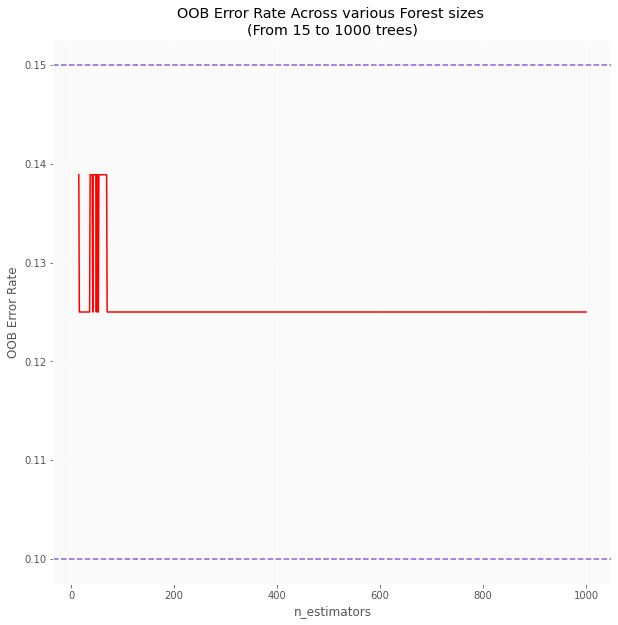

In [15]:
## test_size = 0.25, cv=5

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.15, 
            color='#875FDB',
           linestyle='--')
plt.axhline(0.1, 
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

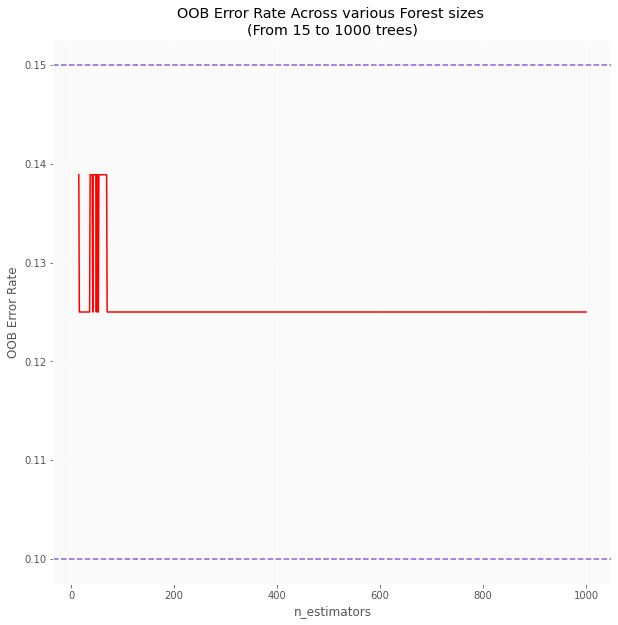

In [16]:
## test_size = 0.2, cv=10 results

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.15, 
            color='#875FDB',
           linestyle='--')
plt.axhline(0.1, 
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [17]:
fit_rf.set_params(n_estimators=400,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=3, n_estimators=400, random_state=42)

In [18]:
fit_rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=3, n_estimators=400, random_state=42)

In [19]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [20]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [21]:
print (var_imp_rf)

{'importance': array([0.08566933, 0.1359253 , 0.10868399, 0.10849851, 0.07976857,
       0.11026123, 0.08150542, 0.0378209 , 0.19531999, 0.05654675]), 'index': array([8, 1, 5, 2, 3, 0, 6, 4, 9, 7])}


In [22]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      name_index[indices[i]],
                      importance[indices[f]]))

In [23]:
print (input_df.columns[1:])

Index(['(50 Percentile Sample) Variance rmsALL',
       '(90 Percentile Sample) Variance rmsALL',
       '(50 Percentile Sample) Variance rmsALL_if',
       '(90 Percentile Sample) Variance rmsALL_if',
       '(50 Percentile) Minimum rmsALL_if',
       '(90 Percentile Sample) Standard Deviation rmsALL_if',
       '(50 Percentile Sample) Variance I_sc',
       '(All Sample) Standard Deviation I_sc', '(50 Percentile) Minimum rmsBB',
       '(50 Percentile Sample) Standard Deviation rmsBB'],
      dtype='object')


In [24]:
# For later use in CART models
names_index = input_df.columns[1:]

In [25]:
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature '(50 Percentile) Minimum rmsBB' has a Mean Decrease in Impurity of 0.19532
2. The feature '(90 Percentile Sample) Variance rmsALL' has a Mean Decrease in Impurity of 0.13593
3. The feature '(90 Percentile Sample) Standard Deviation rmsALL_if' has a Mean Decrease in Impurity of 0.11026
4. The feature '(50 Percentile Sample) Variance rmsALL_if' has a Mean Decrease in Impurity of 0.10868
5. The feature '(90 Percentile Sample) Variance rmsALL_if' has a Mean Decrease in Impurity of 0.10850
6. The feature '(50 Percentile Sample) Variance rmsALL' has a Mean Decrease in Impurity of 0.08567
7. The feature '(50 Percentile Sample) Variance I_sc' has a Mean Decrease in Impurity of 0.08151
8. The feature '(50 Percentile) Minimum rmsALL_if' has a Mean Decrease in Impurity of 0.07977
9. The feature '(50 Percentile Sample) Standard Deviation rmsBB' has a Mean Decrease in Impurity of 0.05655
10. The feature '(All Sample) Standard Deviation I_sc' has a Mean Decrease in Im

In [26]:
def cross_val_metrics(fit, training_set, class_set, estimator, print_results = True, n_splits=10):
    """
    Purpose
    ----------
    Function helps automate cross validation processes while including 
    option to print metrics or store in variable

    Parameters
    ----------
    fit: Fitted model 
    training_set:  Data_frame containing 80% of original dataframe
    class_set:     data_frame containing the respective target vaues 
                      for the training_set
    print_results: Boolean, if true prints the metrics, else saves metrics as 
                      variables

    Returns
    ----------
    scores.mean(): Float representing cross validation score
    scores.std() / 2: Float representing the standard error (derived
                from cross validation score's standard deviation)
    """
    my_estimators = {
    'rf': 'estimators_',
    'nn': 'out_activation_',
    'knn': '_fit_method'
    }
    try:
        # Captures whether first parameter is a model
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)[my_estimators[estimator]]:
            return print("Model does not appear to be trained.")

    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    n = KFold(n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(fit, 
                         training_set, 
                         class_set, 
                         cv = n)
    if print_results:
        for i in range(0, len(scores)):
            print("Cross validation run {0}: {1: 0.3f}".format(i, scores[i]))
        print("Accuracy: {0: 0.3f} (+/- {1: 0.3f})"\
              .format(scores.mean(), scores.std() / 2))
       
        
    else:
        return scores.mean(), scores.std() / 2

In [27]:
cross_val_metrics(fit_rf, 
                  X_train, 
                  y_train.values.ravel(), 
                  'rf',
                  print_results = True, n_splits=5)

Cross validation run 0:  0.867
Cross validation run 1:  0.933
Cross validation run 2:  0.786
Cross validation run 3:  1.000
Cross validation run 4:  0.786
Accuracy:  0.874 (+/-  0.042)


In [28]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

In [29]:
y_pred = fit_rf.predict(X_test)

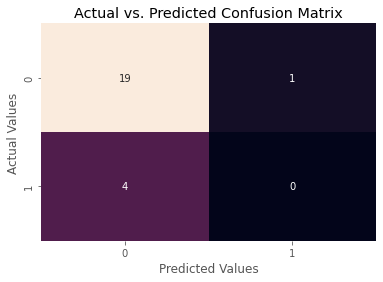

In [30]:
conf_mat = create_conf_mat(y_test.values.ravel(), y_pred.ravel())
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [31]:
accuracy_rf = fit_rf.score(X_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.792


In [32]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.2083


In [33]:
def print_class_report(y_pred, y_test, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(y_pred, 
            y_test))

In [34]:
class_report = print_class_report( y_test, y_pred, 'Random Forest')


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.00      0.00      0.00         4

    accuracy                           0.79        24
   macro avg       0.41      0.47      0.44        24
weighted avg       0.69      0.79      0.74        24



In [35]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = fit_rf.predict_proba(X_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test, predictions_prob, pos_label = 1)

In [36]:
auc_rf = auc(fpr2, tpr2)

In [37]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

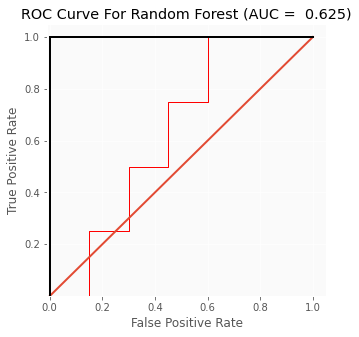

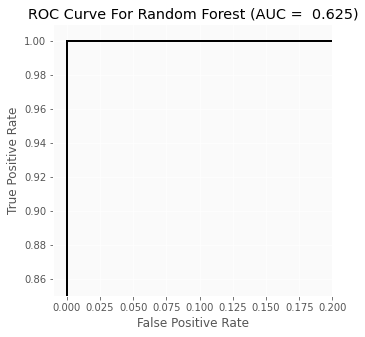

In [38]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

plot_roc_curve(fpr2, tpr2, auc_rf, 'rf', 
               xlim=(-0.01, 0.2), 
               ylim=(0.85, 1.01))